In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

### 1. Are the exam score variables distributed normally? If not, apply Box-Cox transformation. Does anything change?

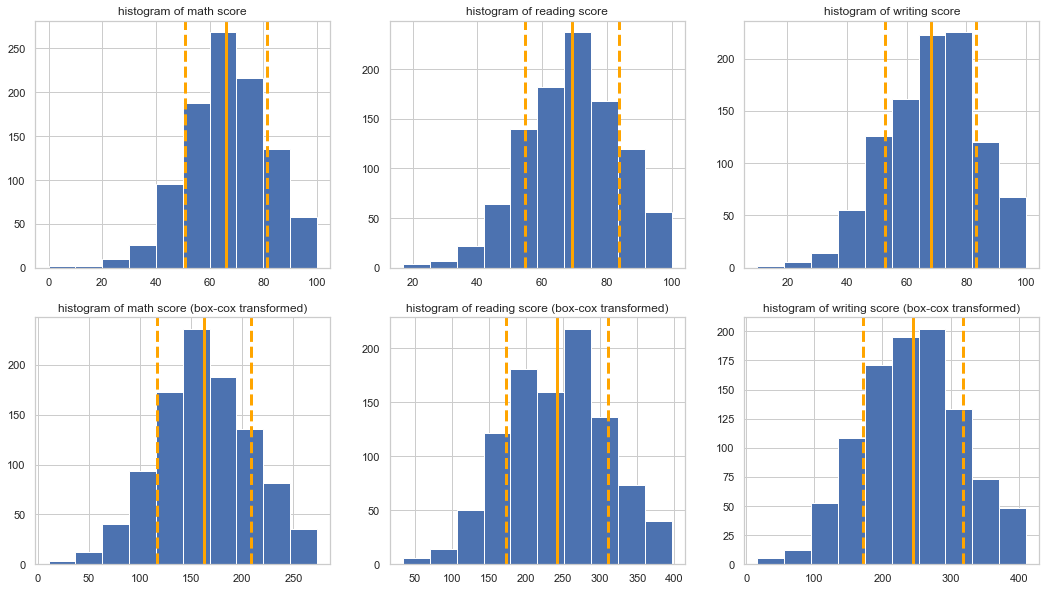

In [8]:
from scipy.stats import boxcox

# there is an observation with math score is equal to 0
# since box-cox transformation only works with positive data
# we are excluding it.
math_boxcox,_ = boxcox(education_df[education_df["math score"] > 0]["math score"])
reading_boxcox,_ = boxcox(education_df["reading score"])
writing_boxcox,_ = boxcox(education_df["writing score"])

plt.figure(figsize=(18,10))

plt.subplot(2, 3, 1)
plt.hist(education_df["math score"])
plt.axvline(education_df["math score"].mean() + education_df["math score"].std(), color='orange', linestyle='dashed', linewidth=3)
plt.axvline(education_df["math score"].mean() - education_df["math score"].std(), color='orange', linestyle='dashed', linewidth=3)
plt.axvline(education_df["math score"].mean(), color='orange', linestyle='solid', linewidth=3)
plt.title("histogram of math score")

plt.subplot(2, 3, 2)
plt.hist(education_df["reading score"])
plt.axvline(education_df["reading score"].mean() + education_df["reading score"].std(), color='orange', linestyle='dashed', linewidth=3)
plt.axvline(education_df["reading score"].mean() - education_df["reading score"].std(), color='orange', linestyle='dashed', linewidth=3)
plt.axvline(education_df["reading score"].mean(), color='orange', linestyle='solid', linewidth=3)
plt.title("histogram of reading score")

plt.subplot(2, 3, 3)
plt.hist(education_df["writing score"])
plt.axvline(education_df["writing score"].mean() + education_df["writing score"].std(), color='orange', linestyle='dashed', linewidth=3)
plt.axvline(education_df["writing score"].mean() - education_df["writing score"].std(), color='orange', linestyle='dashed', linewidth=3)
plt.axvline(education_df["writing score"].mean(), color='orange', linestyle='solid', linewidth=3)
plt.title("histogram of writing score")

plt.subplot(2, 3, 4)
plt.hist(math_boxcox)
plt.axvline(math_boxcox.mean() + math_boxcox.std(), color='orange', linestyle='dashed', linewidth=3)
plt.axvline(math_boxcox.mean() - math_boxcox.std(), color='orange', linestyle='dashed', linewidth=3)
plt.axvline(math_boxcox.mean(), color='orange', linestyle='solid', linewidth=3)
plt.title("histogram of math score (box-cox transformed)")

plt.subplot(2, 3, 5)
plt.hist(reading_boxcox)
plt.axvline(reading_boxcox.mean() + reading_boxcox.std(), color='orange', linestyle='dashed', linewidth=3)
plt.axvline(reading_boxcox.mean() - reading_boxcox.std(), color='orange', linestyle='dashed', linewidth=3)
plt.axvline(reading_boxcox.mean(), color='orange', linestyle='solid', linewidth=3)
plt.title("histogram of reading score (box-cox transformed)")

plt.subplot(2, 3, 6)
plt.hist(writing_boxcox)
plt.axvline(writing_boxcox.mean() + writing_boxcox.std(), color='orange', linestyle='dashed', linewidth=3)
plt.axvline(writing_boxcox.mean() - writing_boxcox.std(), color='orange', linestyle='dashed', linewidth=3)
plt.axvline(writing_boxcox.mean(), color='orange', linestyle='solid', linewidth=3)
plt.title("histogram of writing score (box-cox transformed)")

plt.show()

In [9]:

from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(education_df["math score"])
norm_stats = normaltest(education_df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(education_df["reading score"])
norm_stats = normaltest(education_df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(education_df["writing score"])
norm_stats = normaltest(education_df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


### 2. Say, we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed or not. If it's not normally distributed, apply Box-Cox transformation and check whether the transformed variable is normally distributed.

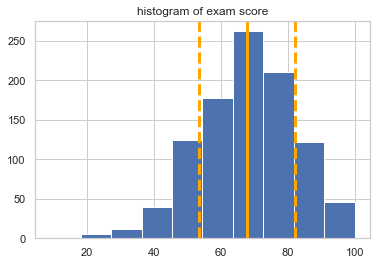

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [16]:
exam_score = (education_df["math score"] +
              education_df["reading score"] + education_df["writing score"])/3

plt.hist(exam_score)
plt.axvline(exam_score.mean() + exam_score.std(), color='orange', linestyle='dashed', linewidth=3)
plt.axvline(exam_score.mean() - exam_score.std(), color='orange', linestyle='dashed', linewidth=3)
plt.axvline(exam_score.mean(), color='orange', linestyle='solid', linewidth=3)
plt.title("histogram of exam score")
plt.show()

jb_stats = jarque_bera(exam_score)
norm_stats = normaltest(exam_score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

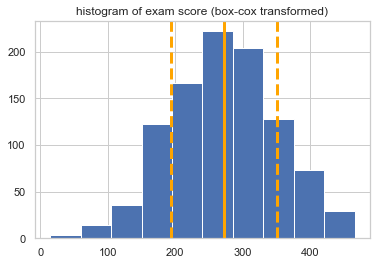

Jarque-Bera test statistics is 2.4353989331279 and p value is 0.2959101356398447
Normality test statistics is 2.779857602227616 and p value is 0.24909303914726724


In [17]:
exams_boxcox,_ = boxcox(exam_score)

plt.hist(exams_boxcox)
plt.axvline(exams_boxcox.mean() + exams_boxcox.std(), color='orange', linestyle='dashed', linewidth=3)
plt.axvline(exams_boxcox.mean() - exams_boxcox.std(), color='orange', linestyle='dashed', linewidth=3)
plt.axvline(exams_boxcox.mean(), color='orange', linestyle='solid', linewidth=3)
plt.title("histogram of exam score (box-cox transformed)")
plt.show()

jb_stats = jarque_bera(exams_boxcox)
norm_stats = normaltest(exams_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 2.4353987431906026 and p value is 0.29591016374203183
Normality test statistics is 2.779857245981238 and p value is 0.2490930835165177
After we applied Box-Cox transformation, the transformed variable is now normally distributed. Jarque-Bera and Normal tests also confirm this.

After we applied Box-Cox transformation, the transformed variable is now normally distributed. Jarque-Bera and Normal tests also confirm this.

### 3. Which variables do seem to be related with the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of the success in the exams, which variables in our dataset might be useful?

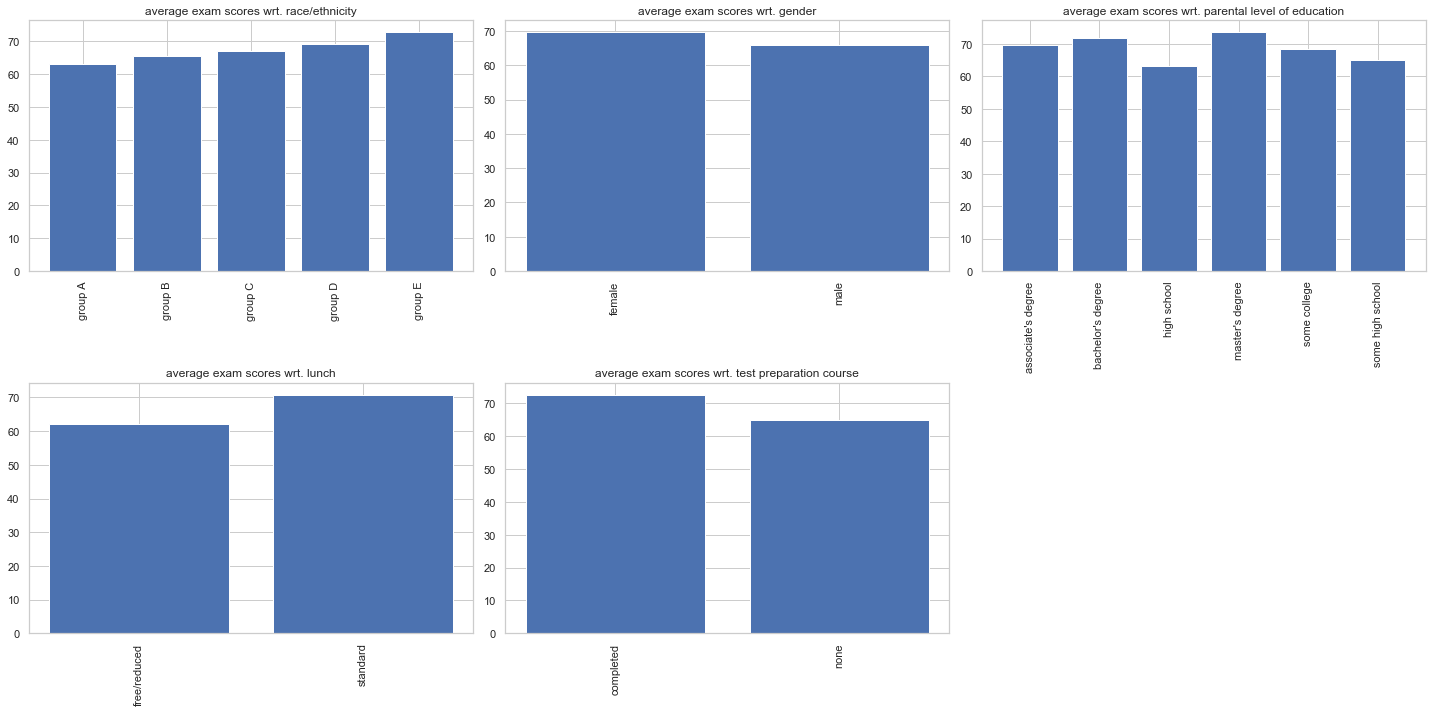

In [15]:
education_df["exam_score"] = exam_score

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.bar(education_df.groupby("race/ethnicity")
        ["exam_score"].mean().index, education_df.groupby("race/ethnicity")["exam_score"].mean())

plt.title("average exam scores wrt. race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(education_df.groupby("gender")
        ["exam_score"].mean().index, education_df.groupby("gender")["exam_score"].mean())

plt.title("average exam scores wrt. gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(education_df.groupby("parental level of education")
        ["exam_score"].mean().index, education_df.groupby("parental level of education")["exam_score"].mean())

plt.title("average exam scores wrt. parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(education_df.groupby("lunch")
        ["exam_score"].mean().index, education_df.groupby("lunch")["exam_score"].mean())

plt.title("average exam scores wrt. lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(education_df.groupby("test preparation course")
        ["exam_score"].mean().index, education_df.groupby("test preparation course")["exam_score"].mean())

plt.title("average exam scores wrt. test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

1. Average exam score increases from group A to group E. Hence race/ethnicity may play an important role in explaining the successes in the exams.

2. Female students seem to be more successful than the males.

3. There is also some variation between the parental levels of education with respect to the exam scores.

4. Lunch type also exhibits variance in the average exam scores. But, this is probably not because of the lunch type itself but because of something, probably financial resources, that affects both the lunch type and the exam scores.

5. Those who completed the test preparation course seem to be more successful than the others.

Considering all these, all variables might be used in explaining the success in the exams but the lunch variable should be used precautiously.